In [7]:
from typing import Union, List

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import utils

sns.set(style="darkgrid")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train.csv', index_col='Id').sample(frac=1)  # sample(frac=1) -> randomize values
target_column = 'SalePrice'
df.shape

(1460, 80)

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
834,20,RL,100.0,10004,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,167000
517,80,RL,NaN,10448,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,GdPrv,NaN,0,8,2009,COD,Abnorml,158000
1412,50,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,9,2009,WD,Normal,140000
904,20,RL,50.0,14859,Pave,NaN,IR1,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,8,2006,New,Partial,240000
117,20,RL,NaN,11616,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,139000


### Посмотрим на целевую переменную, виден ее разброс. Избавимся от него

In [ ]:
df[target_column].describe()

(106475.0, 442567.0100000005)

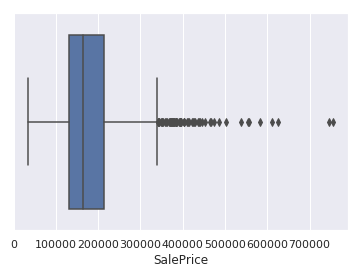

In [3]:
sns.boxplot(df[target_column]);
assert utils.get_count_nan(df, target_column)[target_column] == 0;

df[target_column].quantile(0.1), df[target_column].quantile(0.99)

In [3]:
top_quantile = df[target_column].quantile(0.99)
bottom_quantile = df[target_column].quantile(0.1)
df = df[df[target_column] < top_quantile]  # can try for improve model quality
df = df[df[target_column] > bottom_quantile]  # can try for improve model quality

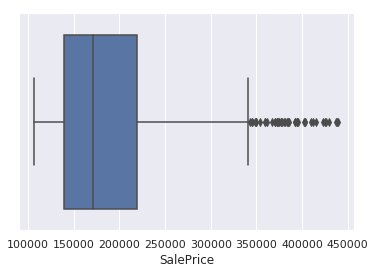

In [6]:
sns.boxplot(df[target_column]);

In [ ]:
df.head()

### Построим зависимости все переменных от целевой

In [ ]:
all_columns = [column for column in df.columns if column != target_column]
print('Count columns=%d \n %s' % (len(all_columns), all_columns))

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[:10])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[10:20])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[20:30])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[30:40])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[40:50])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[50:60])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[60:70])

In [ ]:
utils.draw_relation_columns_to_target(df, target_column, columns=all_columns[70:80])

По графикам видно, где категориальные данные, какие стоит брать, а какие нет

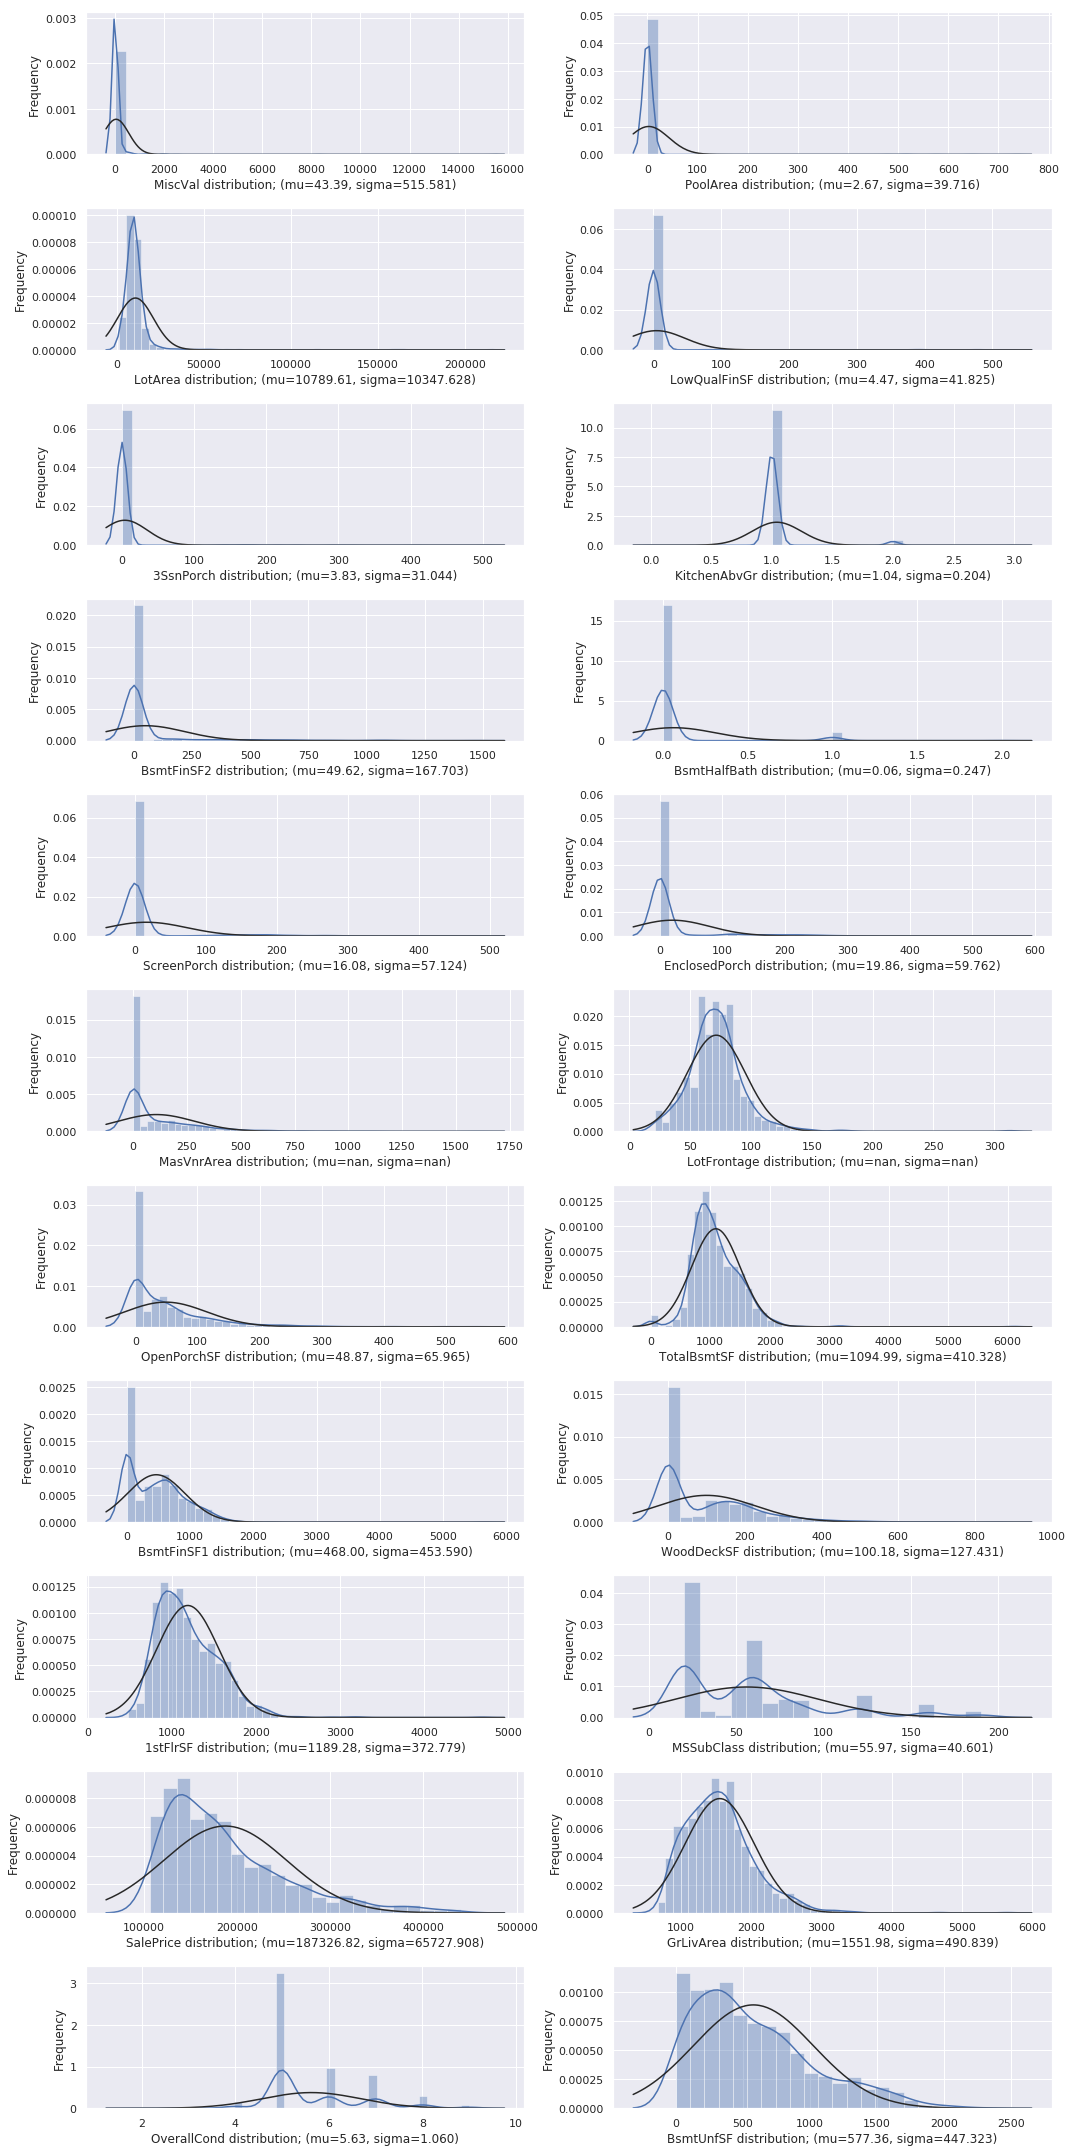

In [8]:
skewed_columns = utils.get_skewed_columns(df)
utils.draw_skewed_data(df[skewed_columns])

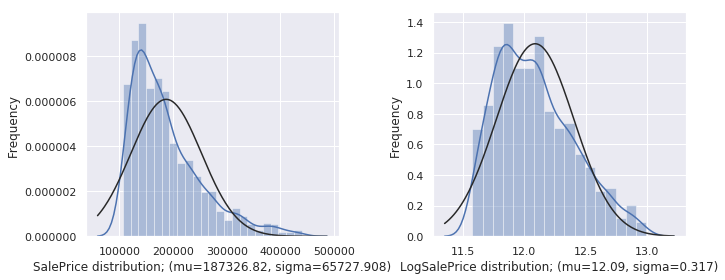

In [23]:
# уберем перекос для SalePrice
utils.draw_skewed_data(
    pd.DataFrame({
        'SalePrice': df['SalePrice'], 
        'LogSalePrice': np.log1p(df['SalePrice']),
    }),
    figsize=(10, 4)
)

Построим матрицу корреляций
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

In [5]:
categorical_values = [
    'MSZoning', 'LotShape', 'BldgType', 'HouseStyle', 'MasVnrType', 'ExterQual', 'Foundation',
    'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType',
    'GarageFinish', 'YrSold', 'SaleType',
]

variable_values = [
    'MSSubClass', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
    'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 
    'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
    'GarageCars', 'GarageArea', 'MoSold',
]
skewed_columns = list(set(skewed_columns).intersection(variable_values))

base_df = df[variable_values + categorical_values + [target_column]]

In [6]:
skewed_columns

['LotArea',
 'MSSubClass',
 'BsmtFinSF1',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtUnfSF']

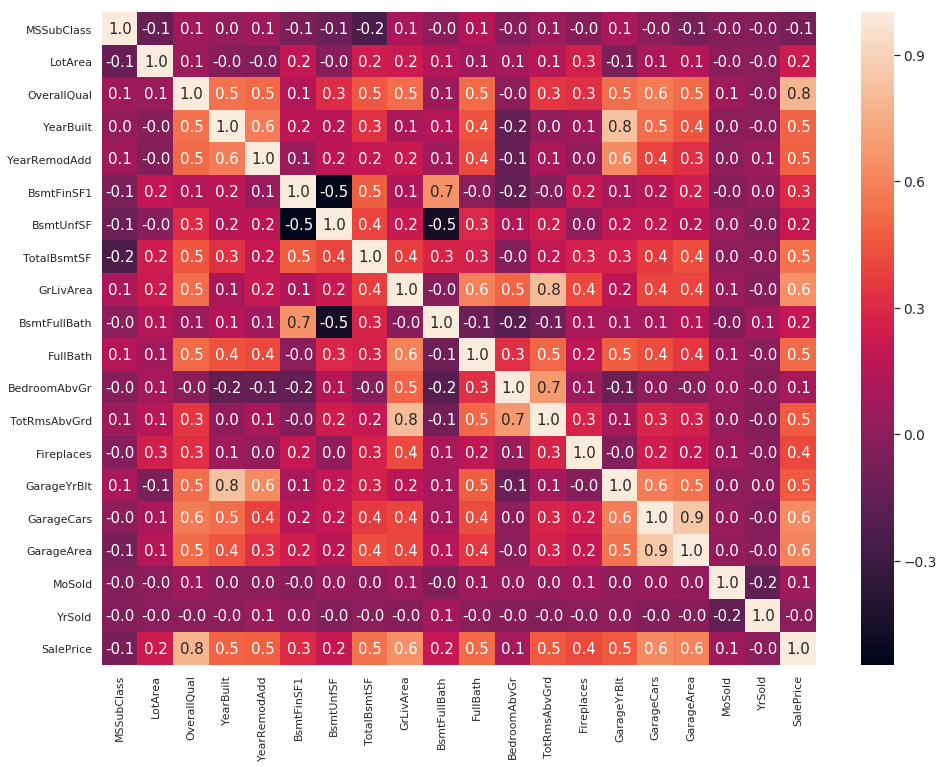

In [40]:
plt.subplots(figsize=(16, 12))
corrmat = base_df.corr()
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, fmt='.1f');

Посмотрим кто тут наиболее коррелирован

In [49]:
utils.get_columns_correlations(base_df).head(5)

SalePrice    SalePrice       1.000000
GarageCars   GarageArea      0.851881
GarageYrBlt  YearBuilt       0.828754
GrLivArea    TotRmsAbvGrd    0.810592
SalePrice    OverallQual     0.777121
dtype: float64

GarageCars и GarageArea сильно кореллируют 0.85

YrSold совсем не коррелирует с SalePrice

посмотрим на пропущенные данные

In [ ]:
delete_columns = {'YrSold'}
variable_values = [v for v in variable_values if v not in delete_columns]
categorical_values = [v for v in categorical_values if v not in delete_columns]

In [ ]:
utils.get_count_nan(df, variable_values)

In [37]:
# более крутой способ (из статьи)
total = base_df.isnull().sum().sort_values(ascending=False)
percent = (base_df.isnull().sum()/base_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(8)

,Total,Percent
GarageYrBlt,35,0.026944
GarageFinish,35,0.026944
GarageType,35,0.026944
BsmtExposure,18,0.013857
BsmtFinType1,17,0.013087
BsmtQual,17,0.013087
MasVnrType,7,0.005389
TotalBsmtSF,0,0.000000


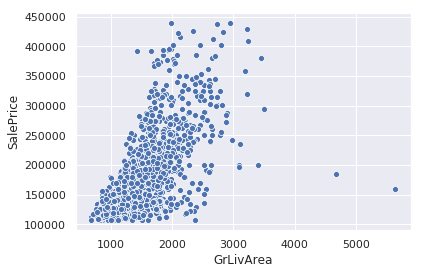

In [38]:
sns.scatterplot(df['GrLivArea'], df[target_column])